## Student: Nguyen, Long

# Problem 1

In [1]:
# Plotting support
from matplotlib import pyplot as plt
# Standard libraries
import pandas as pd
import sklearn as sk

In [2]:
# cd d:\CSC 503
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1)

In [3]:
import os
os.chdir("drive/My Drive/CSC_503_A1")
elections = pd.read_csv('elections.csv') 
elections.info() # Population's data type is object (mixed of non-num)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 78 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   FIPS                                                              3145 non-null   int64  
 1   VOTES                                                             3145 non-null   int64  
 2   PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,           3145 non-null   float64
 3   PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,                3145 non-null   float64
 4   PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,  3145 non-null   float64
 5   PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,             3145 non-null   float64
 6   UNEMPLOYMENT RATE                                                 3145 non-null   float64
 7   POP ESTIMATE                     

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [4]:
elections['POPULATION'] = pd.to_numeric(elections['POPULATION'],errors='coerce')
elections['POPULATION'].isna().sum()

5

In [5]:
elections['POPULATION'] = elections['POPULATION'].fillna(0)

#convert non-numeric to NaN and then replace it with 0
elections['POPULATION'].head()

0      1311.0
1    620961.0
2    156545.0
3      5559.0
4    190039.0
Name: POPULATION, dtype: float64

2)

In [6]:
# If UTF has problems, use ISO
# fips = pd.read_csv('fips-by-state.csv',encoding = "ISO-8859-1")
fips = pd.read_csv('fips-by-state.csv')
fips.columns = fips.columns.str.upper()
fips.head()

,FIPS,NAME,STATE
0,1001,Autauga County,AL
1,1003,Baldwin County,AL
2,1005,Barbour County,AL
3,1007,Bibb County,AL
4,1009,Blount County,AL


Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [7]:
merged = elections.merge(fips, how='inner', on='FIPS')
merged.pop('FIPS')
merged.head()

,VOTES,"PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,","PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,","PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,","PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,",UNEMPLOYMENT RATE,POP ESTIMATE,AMISH,BUDDHIST,CATHOLIC,...,MULTI FEMALE RATE,WHITE RATE,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,NAME,STATE
0,709,6.5,33.4,33.6,26.6,2.5,1260.0,0,0,152,...,0,0.968254,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE
1,208980,17.5,29.8,24.1,28.7,7.7,621849.0,0,0,228,...,0,0.316984,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD
2,77261,6.2,20.6,24.5,48.7,2.7,161382.0,0,1,500,...,0,0.912208,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT
3,7471,9.4,40.9,34.1,15.5,12.5,6341.0,0,0,161,...,0,0.757510,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK
4,136392,6.1,21.2,30.5,42.1,3.9,226640.0,0,1,287,...,0,0.892834,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL


3)

In [8]:
educationCol = ["PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,", "PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,", "PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,","PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,"]
merged['EDUCATION'] = merged[educationCol[1]] + merged[educationCol[2]] + merged[educationCol[3]]
for x in educationCol: 
    merged.pop(x)
merged.head()

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,AMISH,BUDDHIST,CATHOLIC,CHRISTIAN GENERIC,EASTERN ORTHODOX,HINDU,JEWISH,...,WHITE RATE,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,NAME,STATE,EDUCATION
0,709,2.5,1260.0,0,0,152,138,0,0,0,...,0.968254,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE,93.6
1,208980,7.7,621849.0,0,0,228,301,8,0,43,...,0.316984,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD,82.6
2,77261,2.7,161382.0,0,1,500,116,0,0,9,...,0.912208,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT,93.8
3,7471,12.5,6341.0,0,0,161,199,0,0,0,...,0.757510,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,90.5
4,136392,3.9,226640.0,0,1,287,191,1,9,4,...,0.892834,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL,93.8


In [9]:
reglionPop = ['AMISH', 'BUDDHIST',
       'CATHOLIC', 'CHRISTIAN GENERIC', 'EASTERN ORTHODOX', 'HINDU', 'JEWISH',
       'MAINLINE CHRISTIAN', 'MORMON', 'MUSLIM', 'NON-CATHOLIC CHRISTIAN',
       'OTHER', 'OTHER CHRISTIAN', 'OTHER MISC', 'PENTECOSTAL / CHARISMATIC',
       'PROTESTANT DENOMINATION', 'ZOROASTRIAN']
merged['RELIGION'] = merged.iloc[:, 3:20].drop_duplicates().apply(lambda row: row.nlargest(3).values[-1],axis=1)
for x in reglionPop:
    merged.pop(x)
merged.head()

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,NAME,STATE,EDUCATION,RELIGION
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE,93.6,138
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD,82.6,108
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT,93.8,55
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,90.5,67
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL,93.8,83


In [10]:
ageOld = ['55-59 RATE', '60-64 RATE', '65-69 RATE', '70-74 RATE',
       '75-79 RATE', '80-84 RATE', '85+ RATE']
ageYoung = ['0-4 RATE', '5-9 RATE', '10-14 RATE', '15-19 RATE', '20-24 RATE']
ageAdult = ['25-29 RATE', '30-34 RATE', '35-39 RATE', '40-44 RATE', '45-49 RATE','50-54 RATE']
merged['AGE OLD'] = merged[ageOld].sum(axis=1)
merged['AGE YOUNG'] = merged[ageYoung].sum(axis=1)
merged['AGE ADULT'] = merged[ageAdult].sum(axis=1)
for x in ageOld:
    merged.pop(x)
for x in ageYoung:
    merged.pop(x)
for x in ageAdult:
    merged.pop(x)
    
merged.head()

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,NAME,STATE,EDUCATION,RELIGION,AGE OLD,AGE YOUNG,AGE ADULT
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0.008730,0.562698,0,Sioux County,NE,93.6,138,0.350794,0.266667,0.318254
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,0.009735,0.336062,1,Baltimore city,MD,82.6,108,0.205249,0.322959,0.435202
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,0.010317,0.478746,1,Chittenden County,VT,93.8,55,0.221964,0.342702,0.385663
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,90.5,67,0.221781,0.319734,0.390365
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0.009553,0.601800,0,St. Johns County,FL,93.8,83,0.261882,0.286295,0.377837


In [11]:
import re
ethnicFemale = []
ethnicMale = []
for x in merged.columns:
    if (re.search("(.)*(FEMALE)", x)):
        ethnicFemale.append(x)
    elif (re.search("(.)*(MALE)", x)):
        ethnicMale.append(x)
# ethnicFemale
# ethnicMale
merged['ETHNIC FEMALE'] = merged[ethnicFemale].apply(lambda row: row.nlargest(2).values[-1],axis=1)
merged['ETHNIC MALE'] = merged[ethnicMale].apply(lambda row: row.nlargest(2).values[-1],axis=1)

for x in ethnicFemale:
    merged.pop(x)
for x in ethnicMale:
    merged.pop(x)
    
merged.head()

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,DEMOCRAT,NAME,STATE,EDUCATION,RELIGION,AGE OLD,AGE YOUNG,AGE ADULT,ETHNIC FEMALE,ETHNIC MALE
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0,Sioux County,NE,93.6,138,0.350794,0.266667,0.318254,0.470635,0.497619
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,1,Baltimore city,MD,82.6,108,0.205249,0.322959,0.435202,0.342236,0.287036
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,1,Chittenden County,VT,93.8,55,0.221964,0.342702,0.385663,0.466372,0.445837
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0,Prince of Wales-Hyder Census Area,AK,90.5,67,0.221781,0.319734,0.390365,0.382214,0.375296
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0,St. Johns County,FL,93.8,83,0.261882,0.286295,0.377837,0.457739,0.435095


In [12]:
removeFeature = ['POVERTY UNDER 18 PCT','HOUSING UNITS']
for x in merged.columns:
    if (re.search("^(AREA)", x)) and not (re.search("(TOTAL AREA)", x)):
        removeFeature.append(x)
    if (re.search("^(DENSITY)", x)):
        removeFeature.append(x)
    if (re.search("^(AGE TOTAL POP)", x)):
        removeFeature.append(x)
        
for x in removeFeature:
    merged.pop(x)
    
merged.columns

Index(['VOTES', 'UNEMPLOYMENT RATE', 'POP ESTIMATE', 'MED HHINC',
       'PER CAPITA INC', 'POVERTY ALL AGES PCT', 'DEEP POV ALL',
       'DEEP POV CHILDREN', 'POPULATION', 'AREA IN SQUARE MILES - TOTAL AREA',
       'WHITE RATE', 'BLACK RATE', 'NATIVE AMERICAN RATE',
       'HAWAIIAN PACIFIC RATE', 'MULTI RATE', 'VOTER TURNOUT RATE', 'DEMOCRAT',
       'NAME', 'STATE', 'EDUCATION', 'RELIGION', 'AGE OLD', 'AGE YOUNG',
       'AGE ADULT', 'ETHNIC FEMALE', 'ETHNIC MALE'],
      dtype='object')

snake_case: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

4)

In [13]:
merged.columns = [x.lower() for x in merged.columns]
merged.columns = [x.replace(' rate','') for x in merged.columns]
merged.columns = merged.columns.str.replace(" ", "_")
merged.columns = ['area' if x=='area_in_square_miles_-_total_area' else x for x in merged.columns]
merged.columns = ['county' if x=='name' else x for x in merged.columns]
merged.columns

Index(['votes', 'unemployment', 'pop_estimate', 'med_hhinc', 'per_capita_inc',
       'poverty_all_ages_pct', 'deep_pov_all', 'deep_pov_children',
       'population', 'area', 'white', 'black', 'native_american',
       'hawaiian_pacific', 'multi', 'voter_turnout', 'democrat', 'county',
       'state', 'education', 'religion', 'age_old', 'age_young', 'age_adult',
       'ethnic_female', 'ethnic_male'],
      dtype='object')

5)

https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.zscore.html

In [14]:
features = ['population', 'pop_estimate','area']
rate = ['med_hhinc','per_capita_inc','unemployment','voter_turnout']
from scipy.stats import zscore
normalized_data = merged[features].apply(zscore)
normalized_rate = merged[rate].apply(lambda x: x/x.max(), axis=0)
pd.concat([normalized_data,normalized_rate],axis=1)

,population,pop_estimate,area,med_hhinc,per_capita_inc,unemployment,voter_turnout
0,-0.309946,-0.307666,0.224357,0.376591,0.434979,0.104167,0.046170
1,1.669843,1.574100,-0.291593,0.333466,0.393995,0.320833,0.027574
2,0.186029,0.177860,-0.153882,0.492761,0.532636,0.112500,0.039281
3,-0.296373,-0.292259,1.691133,0.344211,0.388885,0.520833,0.096672
4,0.293042,0.375737,-0.101063,0.529789,0.583981,0.162500,0.049378
...,...,...,...,...,...,...,...
3135,-0.247860,-0.248995,-0.205028,0.407697,0.397846,0.204167,0.040597
3136,-0.181097,-0.189761,-0.040031,0.325077,0.344458,0.266667,0.033588
3137,-0.307588,-0.305337,-0.166398,0.321853,0.344899,0.100000,0.039164
3138,-0.208172,-0.213118,-0.173048,0.326955,0.353576,0.283333,0.034810


6)

In [15]:
# Mean of pop_estimate
merged['pop_estimate'].mean()

102725.36594745223

In [16]:
# Mean of population
merged['population'].mean()

98320.26751592357

In [17]:
# standard deviation of pop_estimate
merged['pop_estimate'].std()

329843.3798308157

In [18]:
# standard deviation of population
merged['population'].std()

313037.82258524327

In [19]:
# Correlation Score Above 0.9
merged[['population','pop_estimate']].corr()
merged.pop('pop_estimate')

0         1260.0
1       621849.0
2       161382.0
3         6341.0
4       226640.0
          ...   
3135     20609.0
3136     40144.0
3137      2028.0
3138     32441.0
3139     30310.0
Name: pop_estimate, Length: 3140, dtype: float64

In [20]:
# median of voter_turnout_rate   
merged['voter_turnout'].median()

0.437952565

In [21]:
# median of voter_turnout_rate   
merged['unemployment'].median()

5.3

In [22]:
# Quartile of voter
merged['voter_turnout'].quantile([0.25,0.5,0.75])

0.25    0.384838
0.50    0.437953
0.75    0.491642
Name: voter_turnout, dtype: float64

In [23]:
#Quartile of unemployment_rate
merged['unemployment'].quantile([0.25,0.5,0.75])

0.25    4.2
0.50    5.3
0.75    6.5
Name: unemployment, dtype: float64

In [24]:
#IQR [0.75 - 0.25] 0.75
merged['voter_turnout'].quantile(0.75)-merged['voter_turnout'].quantile(0.25)

0.10680454075000001

In [25]:
#IQR [0.75 - 0.25] 0.75
merged['unemployment'].quantile(0.75)-merged['unemployment'].quantile(0.25)

2.3

In [26]:
#mode of combined religion and ethnic female
merged[['religion','ethnic_female']].mode()

,religion,ethnic_female
0,103,0.382214


7)

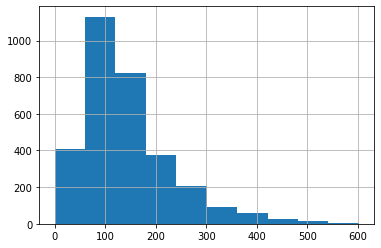

In [27]:
merged['religion'].hist()

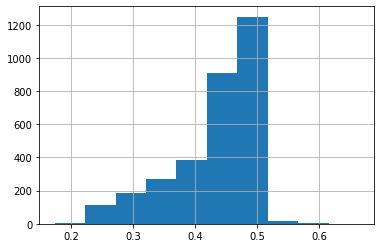

In [28]:
merged['ethnic_male'].hist()

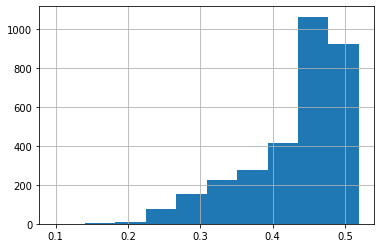

In [29]:
merged['ethnic_female'].hist()

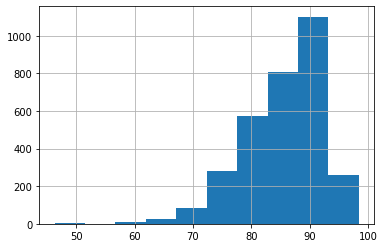

In [30]:
merged['education'].hist()

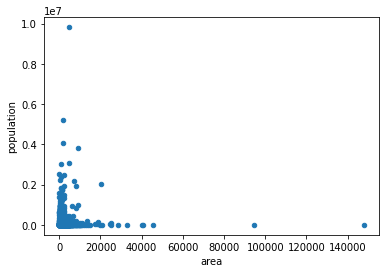

In [31]:
merged[['area','population']].plot.scatter(x='area',y='population')

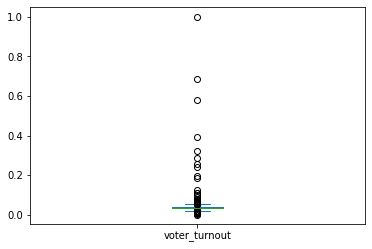

In [32]:
normalized_rate['voter_turnout'].plot.box()

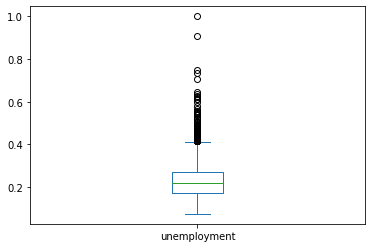

In [33]:
normalized_rate['unemployment'].plot.box()

8)

In [41]:
merged.columns

Index(['votes', 'unemployment', 'med_hhinc', 'per_capita_inc',
       'poverty_all_ages_pct', 'deep_pov_all', 'deep_pov_children',
       'population', 'area', 'white', 'black', 'native_american',
       'hawaiian_pacific', 'multi', 'voter_turnout', 'democrat', 'county',
       'state', 'education', 'religion', 'age_old', 'age_young', 'age_adult',
       'ethnic_female', 'ethnic_male'],
      dtype='object')

9) Label Vector?

In [43]:
merged.to_csv('elections_clean.csv',sep=',',index=False)